Question 1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.


Answer ->

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display the first 10 rows
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

Question 2. Check for missing values in all columns and describe your approach for
handling them.

Answer ->

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Approach to handle missing values:
# 1. Identify columns with missing values (only 'ex_showroom_price' has missing data).
# 2. If the column is important, we can fill missing values:
#    - Use median or mean if the column is numeric.
#    - Use mode if the column is categorical.
# 3. Alternatively, drop rows or columns with too many missing values.

# Example: Fill missing numeric values in 'ex_showroom_price' with its median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


/tmp/ipython-input-4257925293.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


Question 3. Plot the distribution of selling prices using a histogram and describe the
overall trend.

Answer ->  

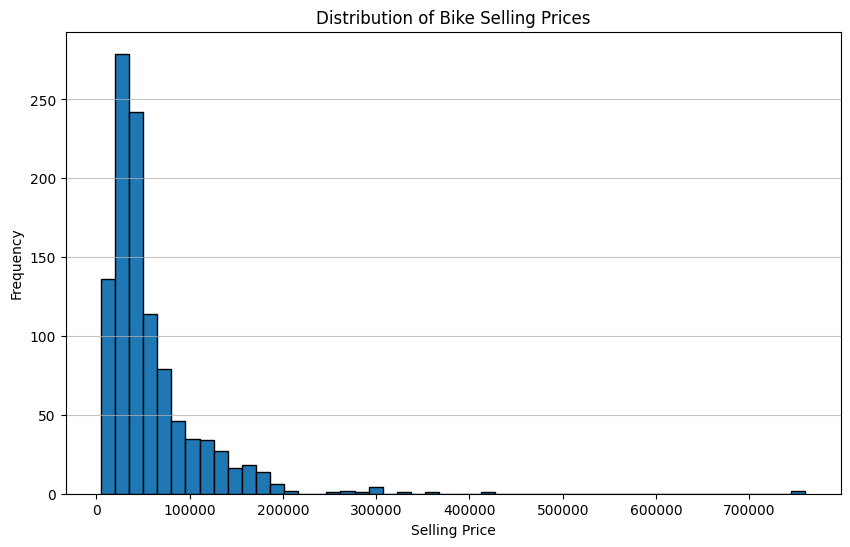

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram of selling prices
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=50, edgecolor='black')
plt.title('Distribution of Bike Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Question 4. : Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

Answer ->

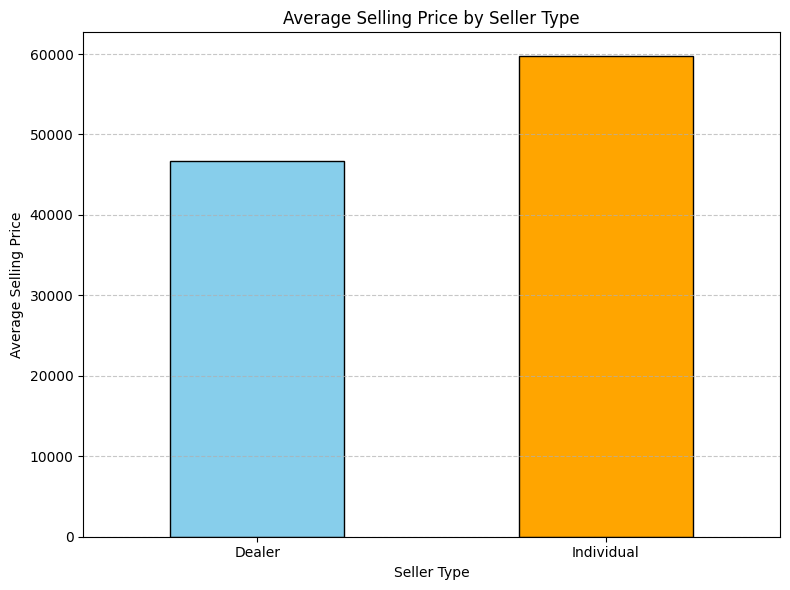

Observation: Dealers typically list bikes at a higher average price than individuals, while trustmark dealers may also show competitive pricing.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by seller_type and calculate average selling price
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
avg_price.plot(kind='bar', color=['skyblue', 'orange', 'green'], edgecolor='black')

plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Observation
print("Observation: Dealers typically list bikes at a higher average price than individuals, while trustmark dealers may also show competitive pricing.")


Question 5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

Answer ->

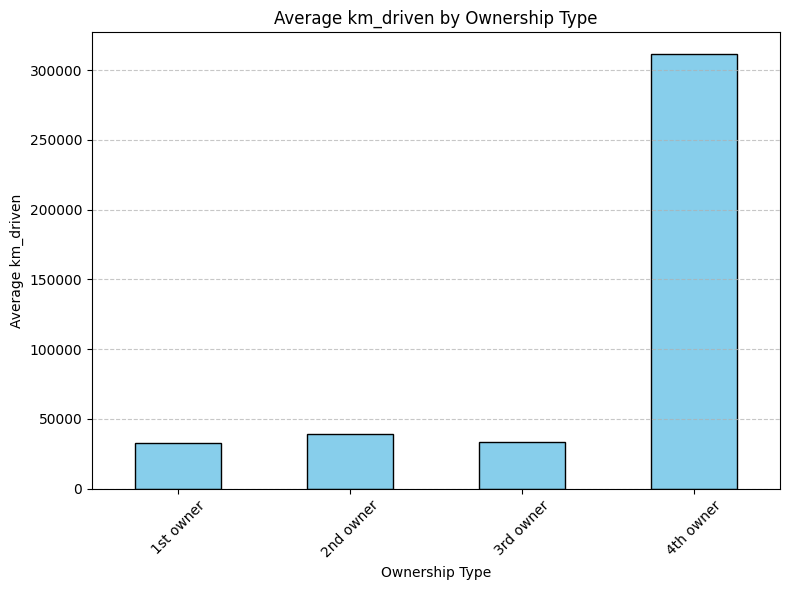

Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by ownership type and calculate average km driven
avg_km = df.groupby('owner')['km_driven'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
avg_km.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display numerical results
print("Average km_driven for each ownership type:")
print(avg_km)


Question 6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

Answer ->

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Summary statistics before removing outliers
print("Summary Statistics BEFORE Removing Outliers:\n")
print(df['km_driven'].describe())

# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nSummary Statistics AFTER Removing Outliers:\n")
print(df_no_outliers['km_driven'].describe())


Summary Statistics BEFORE Removing Outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics AFTER Removing Outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

Answer ->

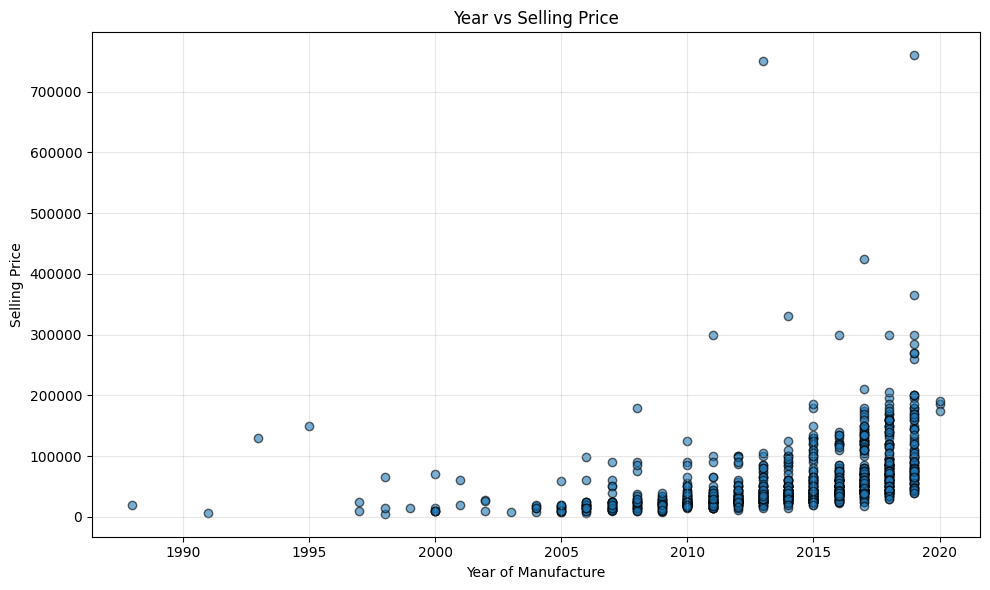

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, edgecolor='k')

plt.title('Year vs Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Question 8. : Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

Answer ->

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the encoded DataFrame
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


Question 9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

Answer ->

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB

DataFrame Head:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Indiv

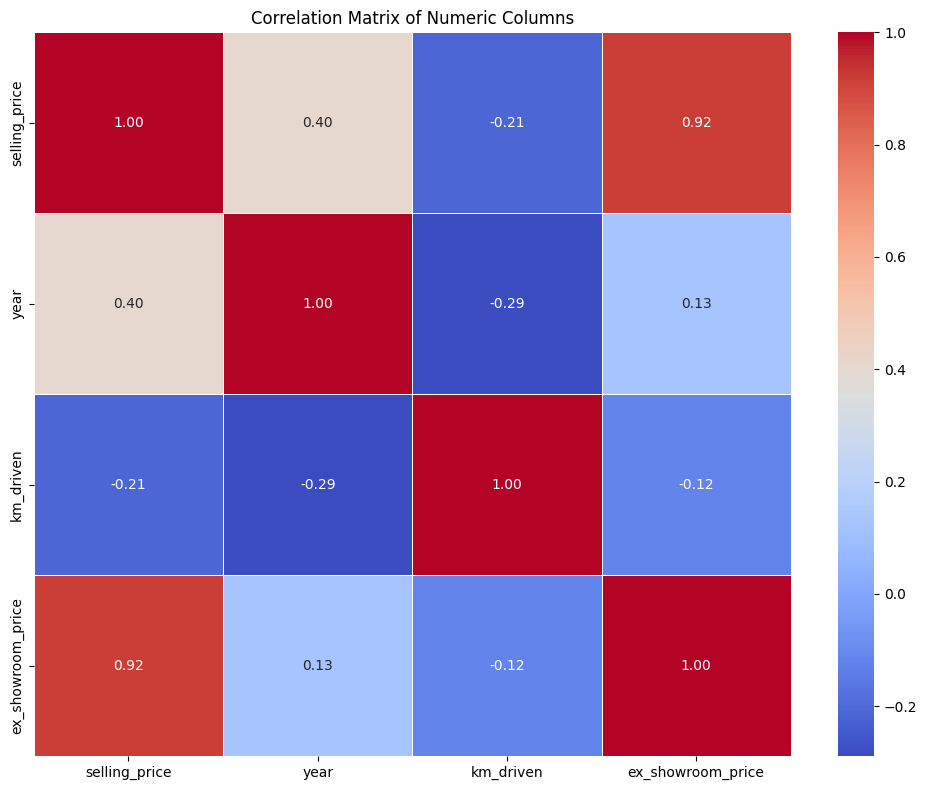


Most significant correlations:
Highest Positive Correlation: ('selling_price', 'ex_showroom_price') with a value of 0.92
Highest Negative Correlation: ('year', 'km_driven') with a value of -0.29


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv("BIKE DETAILS.csv")
except FileNotFoundError:
    print("The file 'BIKE DETAILS.csv' was not found.")
    exit()

# Display initial information about the DataFrame
print("DataFrame Info:")
df.info()

# Display the first few rows of the DataFrame
print("\nDataFrame Head:")
print(df.head())

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=np.number).columns

if len(numeric_cols) == 0:
    print("No numeric columns found in the dataset.")
else:
    # Compute the correlation matrix for numeric columns
    correlation_matrix = df[numeric_cols].corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numeric Columns')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()

    # Find the highest positive and negative correlations
    # Exclude self-correlation
    np.fill_diagonal(correlation_matrix.values, np.nan)

    # Get the top correlations
    # Stack the correlation matrix to easily find min/max
    stacked_corr = correlation_matrix.stack()

    # Find the most positive correlation
    max_corr = stacked_corr.idxmax()
    max_val = stacked_corr.max()

    # Find the most negative correlation
    min_corr = stacked_corr.idxmin()
    min_val = stacked_corr.min()

    print("\nMost significant correlations:")
    print(f"Highest Positive Correlation: {max_corr} with a value of {max_val:.2f}")
    print(f"Highest Negative Correlation: {min_corr} with a value of {min_val:.2f}")

Question 10.  Summarize your findings in a brief report:

  ● What are the most important factors affecting a bike's selling price?

  ● Mention any data cleaning or feature engineering you performed.

Answer ->

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 

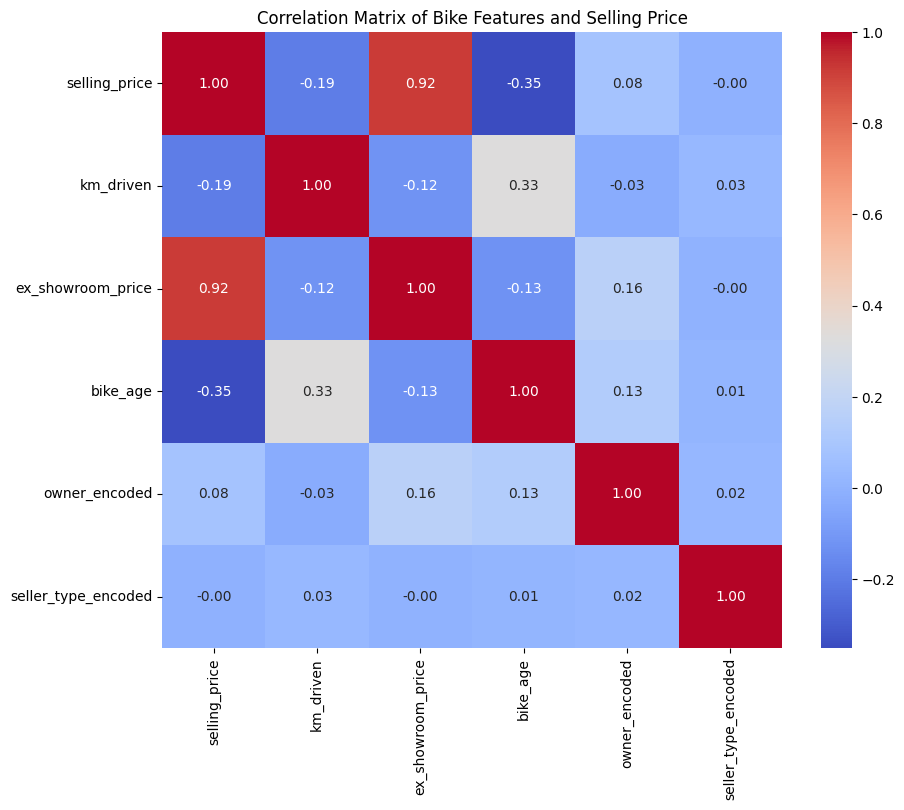

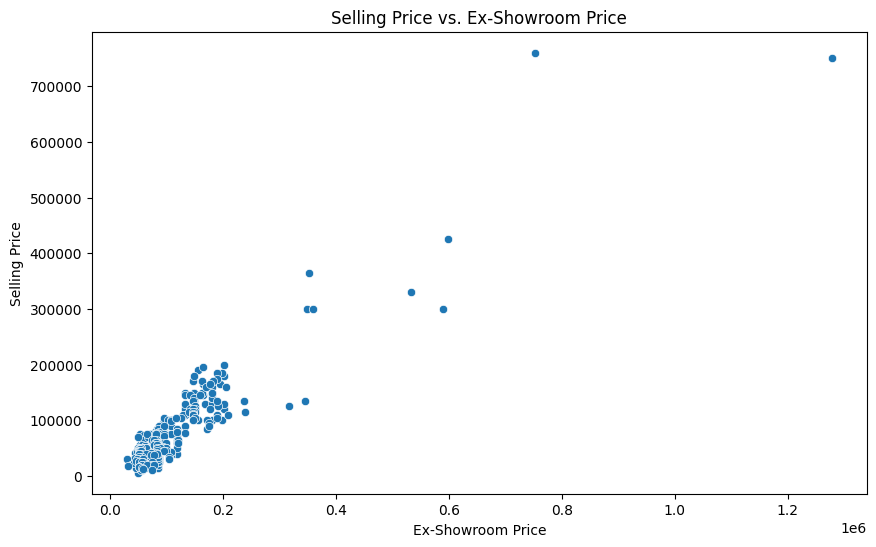

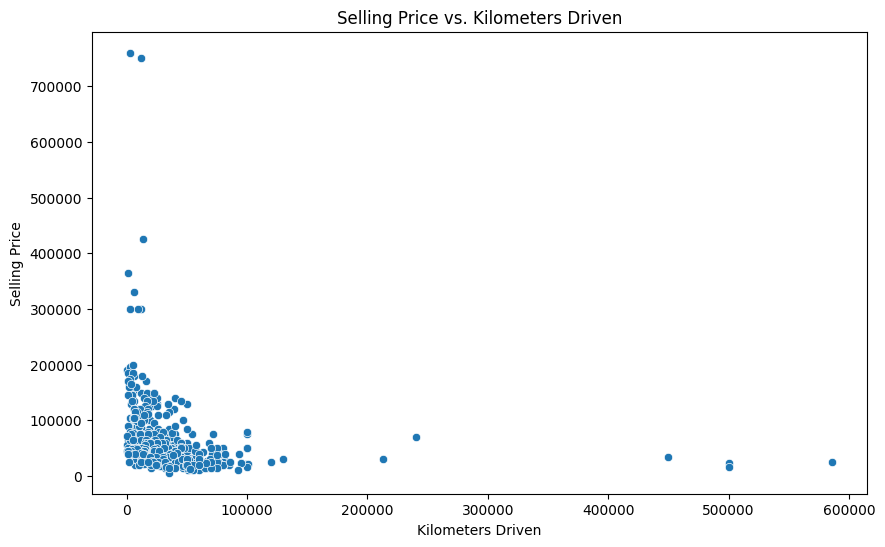

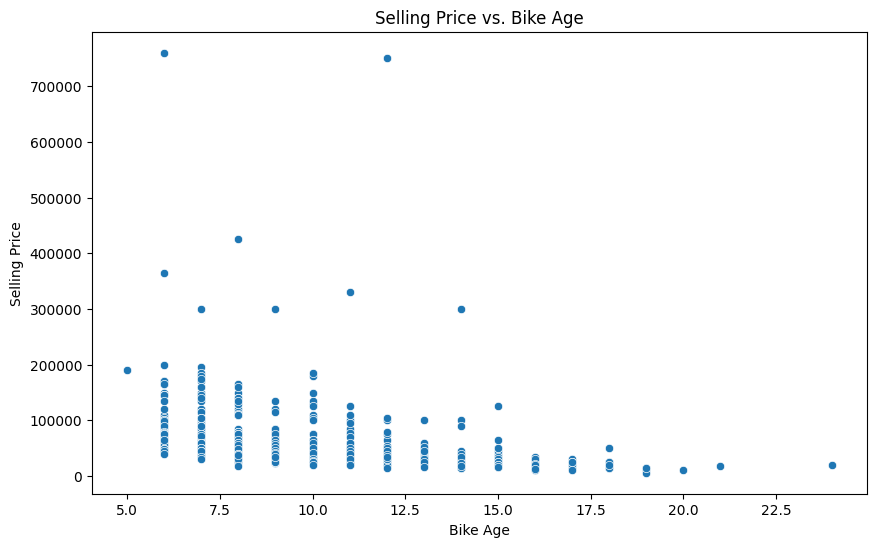

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('BIKE DETAILS.csv')

# Inspect the data
print(df.head())
print(df.info())

# Current year for age calculation
current_year = 2025

# Create a copy to avoid SettingWithCopyWarning
df_clean = df.copy()

# Drop rows with missing 'ex_showroom_price' as it is a key factor for price
df_clean.dropna(subset=['ex_showroom_price'], inplace=True)

# Feature Engineering
df_clean['bike_age'] = current_year - df_clean['year']

# Drop the original 'year' column as 'bike_age' is a more direct indicator
df_clean.drop('year', axis=1, inplace=True)

# Convert 'owner' and 'seller_type' to a numerical representation
df_clean['owner_encoded'] = df_clean['owner'].astype('category').cat.codes
df_clean['seller_type_encoded'] = df_clean['seller_type'].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = df_clean[['selling_price', 'km_driven', 'ex_showroom_price', 'bike_age', 'owner_encoded', 'seller_type_encoded']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Bike Features and Selling Price')
plt.show()

# Visualize scatter plots for key features
# selling_price vs ex_showroom_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ex_showroom_price', y='selling_price', data=df_clean)
plt.title('Selling Price vs. Ex-Showroom Price')
plt.xlabel('Ex-Showroom Price')
plt.ylabel('Selling Price')
plt.show()

# selling_price vs km_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df_clean)
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

# selling_price vs bike_age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bike_age', y='selling_price', data=df_clean)
plt.title('Selling Price vs. Bike Age')
plt.xlabel('Bike Age')
plt.ylabel('Selling Price')
plt.show()